In [1]:
# A notebook for simple lstm exploration
import torch.nn as nn
from torch.autograd import Variable 
import torch
from core_functions import SensorSignals
dataPath = "./second_collection_triggs_rels_32.npz"
S = SensorSignals(dataPath)  
S.split_data()
S.norm_X()
S.setup_tensors()
S.print_shapes()

(1, 1, 1)
Normalizing dataset from [3.06895569] to
[1.]
Normalizing dataset from [3.07249511] to
[1.0011533]
Normalizing dataset from [3.0693023] to
[1.00011294]
Using Device:  cpu , dtype:  torch.float32
Raw data shape:  (7497, 1, 32)
Labels shape:  (7497,)
Unique labels:  [0 1 2]
Shape of test set: (1125, 1, 32)
Shape of train set: (5416, 1, 32)
Shape of validation set: (956, 1, 32)
Fraction of single class in test set:  0.31377777777777777
dtype of inputs:  torch.float32


In [19]:
class lstm(nn.Module):
    def __init__(self):
        super(lstm, self).__init__()
        
        self.input_size = 1 
        self.hidden_dim = 100
        self.out_size = 5
        self.num_layers = 1

        # shape of input ()
        self.lstm = nn.LSTM(self.input_size, self.hidden_dim, num_layers=self.num_layers, batch_first=True)
        self.fc = nn.Linear(self.hidden_dim, self.out_size)
        # self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
        
    def forward(self, x):
        batch_size = x.size(0)
        x = x.reshape((x.shape[0], x.shape[2], 1))

        # # Initialize hidden state
        # h_0 = Variable(torch.zeros(self.num_layers, batch_size, self.hidden_dim)) #hidden state
        # c_0 = Variable(torch.zeros(self.num_layers, batch_size, self.hidden_dim)) #internal state

        # Propagate input through LSTM
        # print("input: ", x.shape)
        lstm_out, _ = self.lstm(x) #lstm with input, hidden, and internal state
        # print("out lstm: ", lstm_out.shape)

        lstm_out = lstm_out[:, -1, :]    # Choose final output of lstm
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        out = self.fc(lstm_out)
        out = self.relu(out)
        out = out.view(batch_size, -1)

        # print("output shape: ", out.shape)
        return out 
 

models = [lstm()]
S.train_multiple_models(models, learning_rate=1e-2, weight_decay=1e-3, batch_size=256, max_epochs=10)

Epoch 1, Batch 1: loss_tr=1.592, loss_val=1.537, train=33.8%, val=36.7%
Epoch 2, Batch 1: loss_tr=1.151, loss_val=1.124, train=36.0%, val=35.1%
Epoch 3, Batch 1: loss_tr=1.123, loss_val=1.117, train=33.8%, val=36.7%
Epoch 4, Batch 1: loss_tr=1.123, loss_val=1.109, train=36.0%, val=35.1%
Epoch 5, Batch 1: loss_tr=1.092, loss_val=1.096, train=33.8%, val=36.7%
Epoch 6, Batch 1: loss_tr=1.093, loss_val=1.101, train=36.0%, val=35.1%
Epoch 7, Batch 1: loss_tr=1.098, loss_val=1.091, train=33.8%, val=36.7%
Epoch 8, Batch 1: loss_tr=1.090, loss_val=1.088, train=36.0%, val=35.1%
Epoch 9, Batch 1: loss_tr=1.146, loss_val=1.128, train=33.8%, val=31.4%
Epoch 10, Batch 1: loss_tr=1.097, loss_val=1.096, train=41.4%, val=39.6%
Training Complete!


Accuracy of test set of best model (idx=0): 60.1%


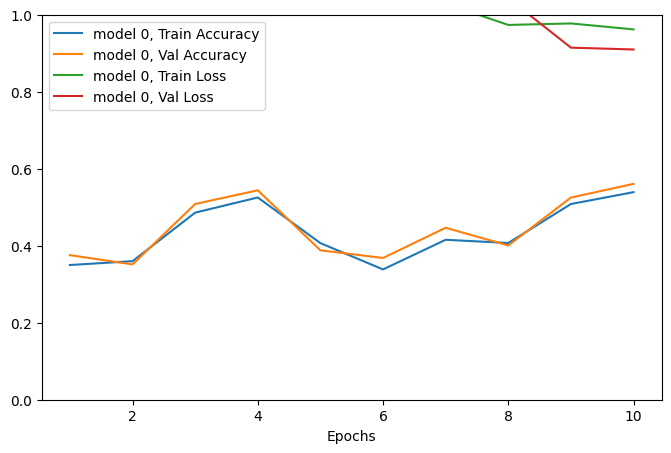

In [18]:
S.plot_train()
S.bestModelAcc()